## 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

%matplotlib inline

In [2]:
df = pd.read_csv('Hitters.csv')
# select numeric columns
df = df.select_dtypes(['number'])

In [3]:
#drop na values
df = df.dropna()
df.isna().sum()

AtBat      0
Hits       0
HmRun      0
Runs       0
RBI        0
Walks      0
Years      0
CAtBat     0
CHits      0
CHmRun     0
CRuns      0
CRBI       0
CWalks     0
PutOuts    0
Assists    0
Errors     0
Salary     0
dtype: int64

In [4]:
X = df.drop(['Salary'],axis = 1)
y = df['Salary']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### 1.1 Lasso

In [5]:
#set alphas
alphas = 10**np.linspace(10,-2,100)*0.5

In [6]:
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []
for alpha in alphas:
    lasso.set_params(alpha = alpha)
    lasso_model = lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_) 

Text(0.5, 1.0, 'Lasso')

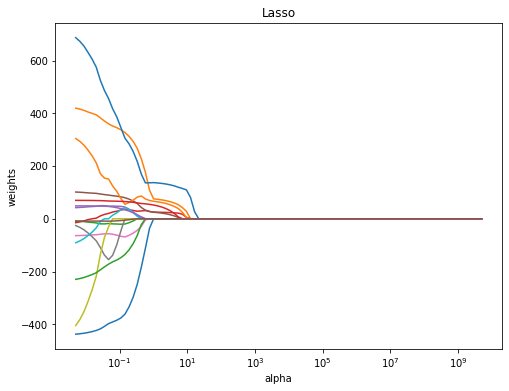

In [7]:
plt.figure(figsize=(8,6))
fig = plt.gca()
fig.plot(alphas, coefs)
fig.set_xscale('log')

plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso')

In [8]:
#We see alpha is around 10^1, thus we check which features are still there when alpha is around 10.
lasso2 = Lasso(alpha = 10, max_iter = 10000, normalize = True).fit(X_train,y_train)
pd.Series(lasso2.coef_, index=X_train.columns)

AtBat      0.000000
Hits       0.514020
HmRun      0.000000
Runs       0.081408
RBI        0.000000
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.305593
CRBI       0.000000
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors    -0.000000
dtype: float64

In [9]:
#10-fold cross-validation to choose the best alpha, then refit model
lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lasso_cv.fit(X_train, y_train)
lasso3 = Lasso(alpha = lasso_cv.alpha_,max_iter = 100000, normalize = True).fit(X_train, y_train)

In [10]:
print('The optimal value of the regularization penalty is',lasso_cv.alpha_)

The optimal value of the regularization penalty is 1.5956122591324386


In [11]:
pd.Series(lasso3.coef_, index = X.columns)

AtBat     -0.000000
Hits       1.548888
HmRun      0.000000
Runs       0.934219
RBI        0.000000
Walks      1.013579
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.383827
CRBI       0.182524
CWalks     0.000000
PutOuts    0.179246
Assists   -0.000000
Errors    -0.000000
dtype: float64

### 1.2

Text(0.5, 1.0, 'Ridge')

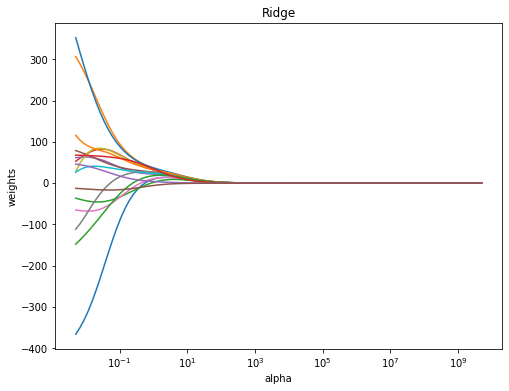

In [12]:
#Coefficient Trajectories
ridge = Ridge(max_iter = 100000, normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(scale(X_train), y_train)
    coefs.append(ridge.coef_)

plt.figure(figsize=(8,6))
fig = plt.gca()
fig.plot(alphas, coefs)
fig.set_xscale('log')

plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge')

In [14]:
# Cross-Validation
ridge_cv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridge_cv.fit(X_train, y_train)

ridge.set_params(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)

Ridge(alpha=0.7599555414764666, copy_X=True, fit_intercept=True,
      max_iter=100000, normalize=True, random_state=None, solver='auto',
      tol=0.001)

In [16]:
print('The optimal value of the regularization penalty is',ridge_cv.alpha_)

The optimal value of the regularization penalty is 0.7599555414764666


## 2. Short Answer